### Pilot Point calibration

* This notebook includes a workflow for setting up the calibration of a groundwater flow model using pilot points (for hydraulic conductivity).

* It is based on a similar workflow in the pyEMU repo



In [1]:
# Import required modules

%matplotlib inline
import os, shutil
import sys
sys.path.append("..")
import platform
import numpy as np
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt

import flopy as flopy
import pyemu

In [2]:
# set up working dir and PEST control file name

working_dir = 'MF2005_dbl'
pst_name = 'mrgb05.pst'

In [3]:
# add path to MODFLOW executable

loadpth = 'MF2005_dbl'
version = 'mf2005'

if platform.system() == 'Windows':
    exe_name = r'D:\Work\exec_Win\MF2005.1_12\bin\mf2005dbl'
    exe_name += '.exe'
else:
    exe_name = '/Volumes/A_2TB/Work/exec_Mac/mf2005dbl'

### Set up pilot points in the zones

We can have pilot point networks in multiple zones.

In [4]:
# load model

m = flopy.modflow.Modflow.load('name.nam',model_ws=loadpth,exe_name=exe_name,
                                    version=version,check=False)

In [5]:
# get some details on the model
m

MODFLOW 9 layer(s), 156 row(s), 80 column(s), 52 stress period(s)

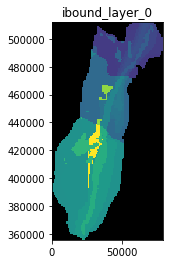

In [6]:
# visualize the first layer
m.bas6.ibound[0].plot()

### We don't need to set up pilot points in inactive cells

We can use a pyemu helper function to set up pilot points at cell centers for active cells.

This helper function is doing a lot of things: writing templates, pilot point files, and creating a shapefile of pilot points.

The every_n_cell arg is key: it decides how many cells to skip between pilot point locations - only active model cells get pilot points (using bas6.ibound).

Like many things with flopy, the SpatialReference is used to define pilot point x and y coordinates

In [7]:
# we want hk pilot points in all the 9 layers:
prefix_dict = {0:["hk0"], 1:["hk1"], 2:["hk2"], 3:["hk3"], 4:["hk4"], 5:["hk5"], 6:["hk6"], 7:["hk7"], 8:["hk8"]}
#prefix_dict = {"hk":[0,1,2,3]}
#prefix_dict = {0:["hk"]} 
df_pp_all = pyemu.gw_utils.setup_pilotpoints_grid(ml=m,prefix_dict=prefix_dict,
                                              pp_dir=working_dir,
                                              tpl_dir=working_dir,
                                              every_n_cell=10, use_ibound_zones=True)

/Users/rishijumani/anaconda2/lib/python2.7/site-packages/pyemu/utils/gw_utils.py:237: UserWarning: setup_pilotpoint_grid has moved to pp_utils...
  warnings.warn("setup_pilotpoint_grid has moved to pp_utils...")


* The dataframe created has a lot of useful info

In [8]:
df_pp_all

,name,x,y,zone,parval1,k,i,j,tpl,parnme,tpl_filename,pp_filename,pargp,scale,parubnd,parlbnd,parchglim,offset,dercom,partrans
0,pp_0000,35500.002087,506311.053388,105.0,1.0,0.0,5.0,35.0,~ hk000 ~,hk000,MF2005_dbl/hk0pp.dat.tpl,MF2005_dbl/hk0pp.dat,hk0,1.0,1.100000e+10,1.100000e-10,factor,0.0,1,log
1,pp_0001,55500.003263,506311.053388,107.0,1.0,0.0,5.0,55.0,~ hk001 ~,hk001,MF2005_dbl/hk0pp.dat.tpl,MF2005_dbl/hk0pp.dat,hk0,1.0,1.100000e+10,1.100000e-10,factor,0.0,1,log
2,pp_0002,65500.003851,506311.053388,150.0,1.0,0.0,5.0,65.0,~ hk002 ~,hk002,MF2005_dbl/hk0pp.dat.tpl,MF2005_dbl/hk0pp.dat,hk0,1.0,1.100000e+10,1.100000e-10,factor,0.0,1,log
3,pp_0003,75500.004439,506311.053388,130.0,1.0,0.0,5.0,75.0,~ hk003 ~,hk003,MF2005_dbl/hk0pp.dat.tpl,MF2005_dbl/hk0pp.dat,hk0,1.0,1.100000e+10,1.100000e-10,factor,0.0,1,log
4,pp_0004,35500.002087,496311.052800,107.0,1.0,0.0,15.0,35.0,~ hk004 ~,hk004,MF2005_dbl/hk0pp.dat.tpl,MF2005_dbl/hk0pp.dat,hk0,1.0,1.100000e+10,1.100000e-10,factor,0.0,1,log
5,pp_0005,45500.002675,496311.052800,107.0,1.0,0.0,15.0,45.0,~ hk005 ~,hk005,MF2005_dbl/hk0pp.dat.tpl,MF2005_dbl/hk0pp.dat,hk0,1.0,1.100000e+10,1.100000e-10,factor,0.0,1,log
6,pp_0006,55500.003263,496311.052800,199.0,1.0,0.0,15.0,55.0,~ hk006 ~,hk006,MF2005_dbl/hk0pp.dat.tpl,MF2005_dbl/hk0pp.dat,hk0,1.0,1.100000e+10,1.100000e-10,factor,0.0,1,log
7,pp_0007,65500.003851,496311.052800,180.0,1.0,0.0,15.0,65.0,~ hk007 ~,hk007,MF2005_dbl/hk0pp.dat.tpl,MF2005_dbl/hk0pp.dat,hk0,1.0,1.100000e+10,1.100000e-10,factor,0.0,1,log
8,pp_0008,75500.004439,496311.052800,109.0,1.0,0.0,15.0,75.0,~ hk008 ~,hk008,MF2005_dbl/hk0pp.dat.tpl,MF2005_dbl/hk0pp.dat,hk0,1.0,1.100000e+10,1.100000e-10,factor,0.0,1,log
9,pp_0009,35500.002087,486311.052212,207.0,1.0,0.0,25.0,35.0,~ hk009 ~,hk009,MF2005_dbl/hk0pp.dat.tpl,MF2005_dbl/hk0pp.dat,hk0,1.0,1.100000e+10,1.100000e-10,factor,0.0,1,log


* We have just defined pilot points as a set of spatially distributed parameters..., now we need to go from pilot points to the model input HK array with the help of the geostatistics functionality in pyEMU.

* We need to calculate the geostatistical factors (weights) used to form the interpolated value for the HK value at each model cell - its a spatially-weighted combination of pilot point values

## Need to create Kriging factors and regularization inputs
Following the guidelines in _Approaches to Highly Parameterized Inversion: Pilot-Point Theory, Guidelines, and Research Directions_ https://pubs.usgs.gov/sir/2010/5168/

### First we need to define a couple geostatistical structures (e.g. variograms)

From _PEST Groundwater Data Utilities Part A: Overview_ page 43, there are 4 acceptable variogram types:

 1. *Spherical*  
### $\gamma\left(h\right)=c\times\left[1.5\frac{h}{a}-0.5\frac{h}{a}^3\right]$ if $h<a$
### $\gamma\left(h\right)=c$ if $h \ge a$  
     
 2. *Exponential*  
### $\gamma\left(h\right)=c\times\left[1-\exp\left(-\frac{h}{a}\right)\right]$  
     
 3. *Gaussian*  
### $\gamma\left(h\right)=c\times\left[1-\exp\left(-\frac{h^2}{a^2}\right)\right]$  
 
 4. *Power*  
### $\gamma\left(h\right)=c\times h^a$
     
 The number refers to `VARTYPE`. `BEARING` and `ANISOTROPY` only apply if there is a principal direction of anisotropy. $h$ is the separation distance, and $a$ is the range, expressed with the `A` parameter.


### First, let's create ``variogram`` and ``GeoStruct`` objects.  

These describe how HK varies spatailly

(0, 2.0)

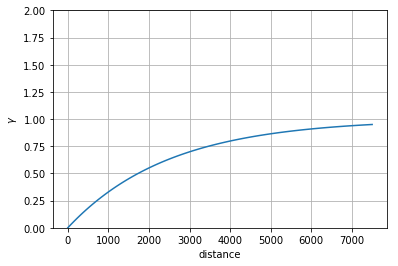

In [9]:
v = pyemu.geostats.ExpVario(contribution=1.0,a=2500)
gs = pyemu.geostats.GeoStruct(variograms=v,nugget=0.0)
ax = gs.plot()
ax.grid()
ax.set_ylim(0,2.0)

* Next get an ``OrdinaryKrige`` object, which needs the ``GeoStruct`` as well as the x, y, and name of the pilot point locations (which happens to be in the ``df_pp_all`` instance).

* Once the ``OrdinaryKrige`` is created, we need to calculate the geostatistical interpolation factors for each model cell.  We do this with the ``.calc_factors_grid()`` method: it needs to know about the model's spatial orientation and also accepts some optional arguments:

In [ ]:
os.chdir('..')

In [10]:
os.chdir('MF2005_dbl')
for lay in range(m.nlay):
    df_pp = df_pp_all.loc[df_pp_all['k'] == lay]
    ok = pyemu.geostats.OrdinaryKrige(gs,df_pp)
    df = ok.calc_factors_grid(m.sr, zone_array=m.bas6.ibound[lay].array, 
                          var_filename=pst_name.replace(".pst",str(lay)+".var.ref"),minpts_interp=1,maxpts_interp=5)
    pp_file = 'hk'+str(lay)+'pp.dat'
    ok.to_grid_factors_file(pp_file+".fac")
    #hk_arr = pyemu.gw_utils.fac2real(pp_file,factors_file=pp_file+".fac",out_file=None)
    

os.chdir('..')

starting interp point loop for 12480 points
took 1.256994 seconds
starting interp point loop for 12480 points
took 2.274303 seconds
starting interp point loop for 12480 points
took 0.771296 seconds
starting interp point loop for 12480 points
took 1.267322 seconds
starting interp point loop for 12480 points
took 0.522607 seconds
starting interp point loop for 12480 points
took 0.856873 seconds
starting interp point loop for 12480 points
took 1.586155 seconds
starting interp point loop for 12480 points
took 3.348977 seconds
starting interp point loop for 12480 points
took 0.800899 seconds
starting interp point loop for 12480 points
took 0.9497 seconds
starting interp point loop for 12480 points
took 0.55694 seconds
starting interp point loop for 12480 points
took 0.690142 seconds
starting interp point loop for 12480 points
took 0.750701 seconds
starting interp point loop for 12480 points
took 6.438998 seconds
starting interp point loop for 12480 points
took 2.137365 seconds
starting inte

took 3.041668 seconds
starting interp point loop for 12480 points
took 3.283437 seconds
starting interp point loop for 12480 points
took 13.758755 seconds
starting interp point loop for 12480 points
took 0.309914 seconds
starting interp point loop for 12480 points
took 3.771712 seconds
starting interp point loop for 12480 points
took 2.653128 seconds
starting interp point loop for 12480 points
took 2.302893 seconds
starting interp point loop for 12480 points
took 7.005866 seconds
starting interp point loop for 12480 points
took 5.947407 seconds
starting interp point loop for 12480 points
took 10.753501 seconds


In [ ]:
os.chdir('..')

In [11]:
os.chdir('MF2005_dbl')
for lay in range(m.nlay):
    pp_file = 'hk'+str(lay)+'pp.dat'
    factors_file = 'hk'+str(lay)+'pp.dat.fac'
    out_file = 'arrays/hk_Layer_'+str(lay)+'.ref'
    fill_value = 1.0000000
    pyemu.utils.geostats.fac2real(pp_file=pp_file,factors_file=factors_file,
                            out_file=out_file,fill_value=fill_value)

os.chdir('..')

/Users/rishijumani/anaconda2/lib/python2.7/site-packages/pyemu/utils/gw_utils.py:250: UserWarning: pp_file_to_dataframe has moved to pp_utils
  warnings.warn("pp_file_to_dataframe has moved to pp_utils")


arrays/hk_Layer_0.ref 0.99999998 1.0 -1e+30
arrays/hk_Layer_1.ref 0.99999998 1.0 -1e+30
arrays/hk_Layer_2.ref 0.99999998 1.0 -1e+30
arrays/hk_Layer_3.ref 0.99999998 1.0 -1e+30
arrays/hk_Layer_4.ref 0.99999998 1.0 -1e+30
arrays/hk_Layer_5.ref 0.99999998 1.0 -1e+30
arrays/hk_Layer_6.ref 0.99999998 1.0 -1e+30
arrays/hk_Layer_7.ref 0.99999999 1.0 -1e+30
arrays/hk_Layer_8.ref 0.99999998 1.0 -1e+30


In [ ]:
# for 1 layer model
#df = ok.calc_factors_grid(m.sr,var_filename=pst_name.replace(".pst","0.var.ref"),minpts_interp=1,maxpts_interp=5)
# os.chdir('MF2005_dbl')
# df = ok.calc_factors_grid(m.sr, zone_array=m.bas6.ibound[0].array, 
#                           var_filename=pst_name.replace(".pst","0.var.ref"),minpts_interp=1,maxpts_interp=10)
# os.chdir('..')

In [17]:
m.bas6.ibound.array.shape

(9, 156, 80)

Geostatistics gives you the interpolation (factors) and also gives you the uncertainty in the areas between control (pilot) points.  Above, we wrote this uncertainty information to an array that has the same rows and cols as the model grid - this array is very useful for understanding the function of the variogram.

In [ ]:
os.getcwd()

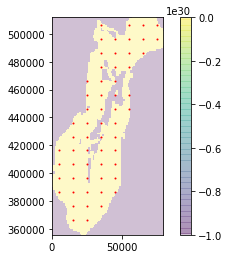

In [12]:
df_pp = df_pp_all.loc[df_pp_all['k'] == 0]

os.chdir('MF2005_dbl')
arr_var = np.loadtxt(pst_name.replace(".pst","0.var.ref"))
ax = plt.subplot(111,aspect="equal")
p = ax.imshow(arr_var,extent=m.sr.get_extent(),alpha=0.25)
plt.colorbar(p)
ax.scatter(df_pp.x,df_pp.y,marker='.',s=4,color='r')
os.chdir('..')

We see that at the pilot point locations (red dots), the uncertainty in the geostats is minimal...as expected. The call to ``.calc_factors_grid()`` also returns a ``DataFrame`` which has useful info - lets look:

In [ ]:
df = ok.calc_factors_grid(m.sr, zone_array=m.bas6.ibound[0].array, 
                            var_filename=pst_name.replace(".pst","0.var.ref"),minpts_interp=1,maxpts_interp=10)

In [ ]:
# gotta fix this
df

We see that there is one row for each model cell, and for each row, we see the distance, names, and weight for the "nearby" pilot points.  The interpolated value for cells that have a pilot point at their center only need one weight - 1.0 - and one pilot point.  Other cells are weighted combinations of pilot points.

Now we need to save the factors (weights) to a file that we will use later to quickly generate a new HK array from a set of pilot point values:

In [17]:
pp_file = 'MF2005_dbl/hk0pp.dat'

In [18]:
ok.to_grid_factors_file(pp_file+".fac")

Just for demo purposes, lets generate ``random`` pilot point values and run them through the factors to see what the ``hk`` array looks like

In [19]:
df_pp.shape

(60, 20)

In [ ]:
## generate random values
df_pp.loc[:,"parval1"] = np.random.random(df_pp.shape[0])
## save a pilot points file
pyemu.gw_utils.write_pp_file(pp_file,df_pp)

In [ ]:
# interpolate the pilot point values to the grid
hk_arr = pyemu.gw_utils.fac2real(pp_file,factors_file=pp_file+".fac",out_file=None)

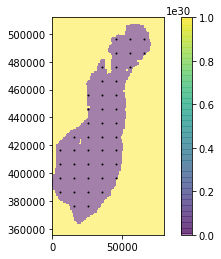

In [64]:
# plot
ax = plt.subplot(111,aspect='equal')
p1 = ax.imshow(hk_arr,interpolation="nearest",extent=m.sr.get_extent(),alpha=0.5)
ax.scatter(df_pp.x,df_pp.y,marker='.',s=4,color='k')
plt.colorbar(p1)

What happens if you recalculate the factors using one point for every cell? Change ``max_interp_pts`` to 1 in the ``calc_factors_grid()`` and rerun these cells...

### An aside on geostatistics and covariance matrices

The ``GeoStruct`` object above was used to interpolate from pilot point locations to each node in the grid.  But this same ``GoeStruct`` also has an important information regarding how the pilot points are related to each other spatially---that is, the ``GeoStruct`` object implies a covariance matrix.  Let's form that matrix 

In [20]:
cov = gs.covariance_matrix(df_pp.x,df_pp.y,df_pp.parnme)

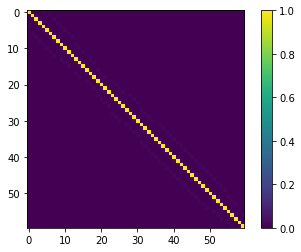

In [21]:
plt.imshow(cov.x)
plt.colorbar()

In [22]:
cov.to_dataframe()

,hk000,hk001,hk002,hk003,hk004,hk005,hk006,hk007,hk008,hk009,...,hk050,hk051,hk052,hk053,hk054,hk055,hk056,hk057,hk058,hk059
hk000,1.000000e+00,3.354625e-04,6.144208e-06,1.125351e-07,1.831563e-02,3.493488e-03,1.304824e-04,3.210412e-06,6.877514e-08,3.354625e-04,...,3.253078e-22,7.350504e-22,1.206720e-21,1.425160e-21,1.206720e-21,1.415763e-23,2.238565e-23,2.610271e-23,2.707651e-25,4.145190e-25
hk001,3.354625e-04,1.000000e+00,1.831563e-02,3.354625e-04,1.304824e-04,3.493488e-03,1.831563e-02,3.493488e-03,1.304824e-04,1.220446e-05,...,2.610271e-23,1.062290e-22,3.253078e-22,7.350504e-22,1.206720e-21,2.354096e-24,6.655096e-24,1.415763e-23,5.085177e-26,1.340898e-25
hk002,6.144208e-06,1.831563e-02,1.000000e+00,1.831563e-02,3.210412e-06,1.304824e-04,3.493488e-03,1.831563e-02,3.493488e-03,5.451494e-07,...,4.935271e-24,2.610271e-23,1.062290e-22,3.253078e-22,7.350504e-22,6.366634e-25,2.354096e-24,6.655096e-24,1.496208e-26,5.085177e-26
hk003,1.125351e-07,3.354625e-04,1.831563e-02,1.000000e+00,6.877514e-08,3.210412e-06,1.304824e-04,3.493488e-03,1.831563e-02,1.702565e-08,...,7.351086e-25,4.935271e-24,2.610271e-23,1.062290e-22,3.253078e-22,1.340898e-25,6.366634e-25,2.354096e-24,3.468108e-27,1.496208e-26
hk004,1.831563e-02,1.304824e-04,3.210412e-06,6.877514e-08,1.000000e+00,1.831563e-02,3.354625e-04,6.144208e-06,1.125351e-07,1.831563e-02,...,1.559994e-20,3.782328e-20,6.489952e-20,7.781112e-20,6.489952e-20,7.350504e-22,1.206720e-21,1.425160e-21,1.415763e-23,2.238565e-23
hk005,3.493488e-03,3.493488e-03,1.304824e-04,3.210412e-06,1.831563e-02,1.000000e+00,1.831563e-02,3.354625e-04,6.144208e-06,3.493488e-03,...,4.643575e-21,1.559994e-20,3.782328e-20,6.489952e-20,7.781112e-20,3.253078e-22,7.350504e-22,1.206720e-21,6.655096e-24,1.415763e-23
hk006,1.304824e-04,1.831563e-02,3.493488e-03,1.304824e-04,3.354625e-04,1.831563e-02,1.000000e+00,1.831563e-02,3.354625e-04,1.304824e-04,...,1.022346e-21,4.643575e-21,1.559994e-20,3.782328e-20,6.489952e-20,1.062290e-22,3.253078e-22,7.350504e-22,2.354096e-24,6.655096e-24
hk007,3.210412e-06,3.493488e-03,1.831563e-02,3.493488e-03,6.144208e-06,3.354625e-04,1.831563e-02,1.000000e+00,1.831563e-02,3.210412e-06,...,1.710888e-22,1.022346e-21,4.643575e-21,1.559994e-20,3.782328e-20,2.610271e-23,1.062290e-22,3.253078e-22,6.366634e-25,2.354096e-24
hk008,6.877514e-08,1.304824e-04,3.493488e-03,1.831563e-02,1.125351e-07,6.144208e-06,3.354625e-04,1.831563e-02,1.000000e+00,6.877514e-08,...,2.238565e-23,1.710888e-22,1.022346e-21,4.643575e-21,1.559994e-20,4.935271e-24,2.610271e-23,1.062290e-22,1.340898e-25,6.366634e-25
hk009,3.354625e-04,1.220446e-05,5.451494e-07,1.702565e-08,1.831563e-02,3.493488e-03,1.304824e-04,3.210412e-06,6.877514e-08,1.000000e+00,...,7.300102e-19,1.923936e-18,3.479981e-18,4.248344e-18,3.479981e-18,3.782328e-20,6.489952e-20,7.781112e-20,7.350504e-22,1.206720e-21


What do these numbers mean? This covariance matrix plays an important role in uncertainty quantification, as well as in governing the way pilot point parameters are adjusted during calibration

### Building a control file using these pilot points

There's a fair amount of support in pyemu for building control files and setting PEST inferfaces. If you have created template files and instruction files, and have used the proposed naming convention, then you can quickly generate a control file using the following call

In [199]:
os.getcwd()

'/Volumes/A_2TB/NMWSC/RSJ/Models/FloPy_MRG_MF_2005/Notebooks/pilot_points_1'

In [23]:
os.chdir('MF2005_dbl')
io_files = pyemu.helpers.parse_dir_for_io_files('.')
pst = pyemu.Pst.from_io_files(*io_files)
os.chdir("..")
io_files

run():inschek sim._os.ins sim._os


(['hk0pp.dat.tpl',
  'hk1pp.dat.tpl',
  'hk2pp.dat.tpl',
  'hk3pp.dat.tpl',
  'hk4pp.dat.tpl',
  'hk5pp.dat.tpl',
  'hk6pp.dat.tpl',
  'hk7pp.dat.tpl',
  'hk8pp.dat.tpl'],
 ['hk0pp.dat',
  'hk1pp.dat',
  'hk2pp.dat',
  'hk3pp.dat',
  'hk4pp.dat',
  'hk5pp.dat',
  'hk6pp.dat',
  'hk7pp.dat',
  'hk8pp.dat'],
 ['sim._os.ins'],
 ['sim._os'])

In [24]:
# the python script should include a call to fac2real to create a structured grid array from calculated kriging factors
pst.model_command = ["python forward_run.py"]

The ``parse_dir_for_io_files()`` helper is looking for files with the ".tpl" and ".ins" extension.  This assumes that the corresponding model input and model output files are the same name, minus the ".tpl" and ".ins" extension, respectively.  These file lists are then passed to another helper, which builds a basic control file for you (``Pst.from_io_files()``).  


The other tpl files were found and parsed - parameter listed in them were added to the control file.  But we have generic entries for initial values bounds...

In [25]:
pst.parameter_data.loc[:,"parval1"] = 5.0 #+ np.random.randn()
pst.parameter_data.loc[:,"parlbnd"] = 5e-2
pst.parameter_data.loc[:,"parubnd"] = 5e1
pst.parameter_data.loc[:,"pargp"] = 'hk'

In [26]:
pst.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
hk000,hk000,log,factor,5.0,0.05,50.0,hk,1.0,0.0,1
hk001,hk001,log,factor,5.0,0.05,50.0,hk,1.0,0.0,1
hk002,hk002,log,factor,5.0,0.05,50.0,hk,1.0,0.0,1
hk003,hk003,log,factor,5.0,0.05,50.0,hk,1.0,0.0,1
hk004,hk004,log,factor,5.0,0.05,50.0,hk,1.0,0.0,1
hk005,hk005,log,factor,5.0,0.05,50.0,hk,1.0,0.0,1
hk006,hk006,log,factor,5.0,0.05,50.0,hk,1.0,0.0,1
hk007,hk007,log,factor,5.0,0.05,50.0,hk,1.0,0.0,1
hk008,hk008,log,factor,5.0,0.05,50.0,hk,1.0,0.0,1
hk009,hk009,log,factor,5.0,0.05,50.0,hk,1.0,0.0,1


In [27]:
pst.write(os.path.join(working_dir,pst_name))

the instruction files in the directory were also found and parsed so that observation listed in the instruction files were added as well.

In [28]:
pst.observation_data

,obsnme,obsval,weight,obgnme
a001,a001,5.524717e+03,1.0,obgnme
a002,a002,5.227227e+03,1.0,obgnme
a003,a003,5.260892e+03,1.0,obgnme
a005,a005,5.465481e+03,1.0,obgnme
a006,a006,5.500308e+03,1.0,obgnme
a007,a007,5.254099e+03,1.0,obgnme
a008,a008,5.274993e+03,1.0,obgnme
a013,a013,5.222653e+03,1.0,obgnme
a014,a014,5.226907e+03,1.0,obgnme
a017,a017,5.390671e+03,1.0,obgnme


### For the MRGB model:

* The pilot points have been set up as multipliers, and you've gotta manually make changes to the MULT package (mults), and to the LPF package

* Also edit the PVAL package (I have removed it)

## Regularization

Regularization is ....

in pyemu, we can add two forms of regularization:
- preferred value: we want the parameter values to stay as close to the initial values as possible
- preferred difference: we prefer the differences in parameter values to be minimized

Preferred value is easy to understand, we simply add ``prior_information`` to the control file to enforce this condition.  pyemu uses a helper for this:

In [ ]:
# load the pre-constructed pst
pst = pyemu.Pst(os.path.join(working_dir,pst_name))

In [ ]:
pyemu.helpers.zero_order_tikhonov(pst,parbounds=False)

In [ ]:
pst.prior_information

Should the weight on preferring HK not to change be the same as preferring recharge not to change?  Seems like we would want recharge to change less than HK.  This preference can be expressed by using the parameter bounds to form the weights

In [ ]:
pyemu.helpers.zero_order_tikhonov(pst,parbounds=True)

In [ ]:
pst.prior_information

 pyemu can do preferred difference regularization too.  The ``Cov``ariance matrix built above expresses the spatial relationship between pilot points, so we use to setup these prior information equations:

In [ ]:
# this messes up the previous prior info
pyemu.helpers.first_order_pearson_tikhonov(pst,cov)

In [ ]:
pst.prior_information

We replaced the preferred value equations with a bunch of new equations.  These equations each include two parameter names and have different weights -  The weights are the pearson correlation coefficients (CC) between the pilot points.  These CC values are calculated from the covariance matrix, which is implied by the geostatistical structure...

In [ ]:
pst.write(os.path.join(working_dir,pst_name))